<a href="https://colab.research.google.com/github/lmmlima/ENV716_EnergyModeling_F2021/blob/main/Lab13/Lab13_MC_FitDistribution_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 13 - Monte Carlo Part 2: Fitting Distribution to Data in Python**

In this lab we will learn how to fit distributions to data sets. The specific learning outcomes are:
* Get familiar with the library scipy.stats and its functios *.fit()*;
* Understand how to use the parameters estimated on the *.fit()* to calculate values for theoretical cdf and pdf;
* Get familiar with *np.linspace()*;
* Get familiar with matplotlib.pyplot and how to plot more than one series in the same graph.


## Initializing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

In [3]:
#Start by loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

## Wind Investment Problem

Recall the wind investment example from lectures. We had two uncertainties **electricity prices** and **wind speed**. Let's see how we could use Monte Carlo to generate scenarios for the two random variables. We learned on Lab 12 how to draw random variates from known distribution. But this time we don't knwo the distribution a priori, we need to fit a distribution first. 


### Fitting a Distribution to **Electricity** Prices


Let's start by importing the data using *pd.read_excel()*. Then let's print summary statistics using function *.describe()*

In [35]:
elect_price_data = pd.read_excel("Wind_Invest_Data.xlsx",sheet_name="Elect_Prices")
print(elect_price_data.head(10),'\n')

#Getting summary statistics
print('Summary Statistics for Electricity Price')
print(elect_price_data.iloc[:,1].describe())

#just transforming data frame into num py array to facilitate reference
elect_price = np.array(elect_price_data.iloc[:,1])

   Hour  Electricity price
0     1           4.446125
1     2           9.039633
2     3           9.399392
3     4           8.439115
4     5           7.955879
5     6           7.388054
6     7           7.313168
7     8           6.232476
8     9           5.470214
9    10           8.612073 

Summary Statistics for Electricity Price
count    8760.000000
mean        7.319906
std         1.842613
min         3.009549
25%         5.990015
50%         7.228339
75%         8.607014
max        11.920589
Name: Electricity price, dtype: float64


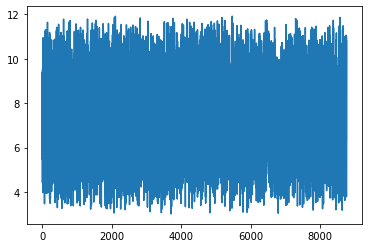

In [36]:
#Initial plot of data
plt.plot(elect_price)

Once you have the data, you need to fit a distribution to your data. 
We will use scipy.stats. A list of distributions available with scipy.stats is available [here](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)

* Step 1: Draw a histogram to choose candidate(s) probability distribution. 
* Step 2: Estimate the parameters of the hypothesized distribution for the sample - in Python, parameters will be estimated automatically using *stats.**dist**.fit()*.
* Step 3: Once you have the parameters calculate the theoritical pdf for the same intervals you used in the histogram you created on Step 1. Compare theoritical with observed.
* Step 4: Repeat Step 3, but now for the cdf.



(array([ 11.,  22.,  50.,  45.,  72.,  82.,  90., 119., 144., 143., 152.,
        183., 209., 229., 228., 251., 234., 292., 310., 273., 293., 356.,
        359., 331., 300., 336., 288., 280., 268., 268., 244., 218., 225.,
        210., 196., 172., 167., 162., 144., 132., 110., 102.,  97., 101.,
         66.,  73.,  42.,  40.,  27.,  14.]),
 array([ 3.00954873,  3.18776954,  3.36599035,  3.54421116,  3.72243196,
         3.90065277,  4.07887358,  4.25709439,  4.4353152 ,  4.61353601,
         4.79175682,  4.96997762,  5.14819843,  5.32641924,  5.50464005,
         5.68286086,  5.86108167,  6.03930248,  6.21752329,  6.39574409,
         6.5739649 ,  6.75218571,  6.93040652,  7.10862733,  7.28684814,
         7.46506895,  7.64328976,  7.82151056,  7.99973137,  8.17795218,
         8.35617299,  8.5343938 ,  8.71261461,  8.89083542,  9.06905623,
         9.24727703,  9.42549784,  9.60371865,  9.78193946,  9.96016027,
        10.13838108, 10.31660189, 10.4948227 , 10.6730435 , 10.85126431,
 

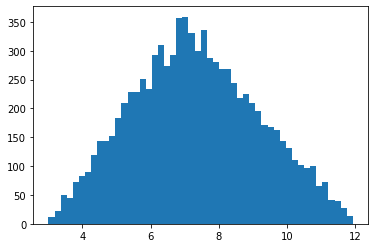

In [38]:
#Plotting histogram of observed data with frequency in the Y axis
plt.hist(elect_price,bins=50)

(array([0.0070458 , 0.0140916 , 0.03202635, 0.02882372, 0.04611795,
        0.05252322, 0.05764744, 0.07622272, 0.0922359 , 0.09159537,
        0.09736011, 0.11721645, 0.13387016, 0.1466807 , 0.14604017,
        0.16077229, 0.14988333, 0.1870339 , 0.19856339, 0.17486389,
        0.18767443, 0.22802763, 0.22994922, 0.21201446, 0.19215812,
        0.21521709, 0.18447179, 0.17934758, 0.17166125, 0.17166125,
        0.1562886 , 0.1396349 , 0.14411859, 0.13451068, 0.1255433 ,
        0.11017065, 0.10696802, 0.10376538, 0.0922359 , 0.08454957,
        0.07045798, 0.06533376, 0.06213113, 0.06469323, 0.04227479,
        0.04675848, 0.02690214, 0.02562108, 0.01729423, 0.00896738]),
 array([ 3.00954873,  3.18776954,  3.36599035,  3.54421116,  3.72243196,
         3.90065277,  4.07887358,  4.25709439,  4.4353152 ,  4.61353601,
         4.79175682,  4.96997762,  5.14819843,  5.32641924,  5.50464005,
         5.68286086,  5.86108167,  6.03930248,  6.21752329,  6.39574409,
         6.5739649 ,  6.75

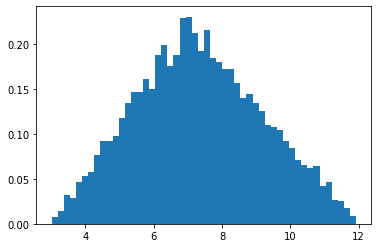

In [42]:
#Plotting histogram of observed data with density in the Y axis
plt.hist(elect_price,bins=50,density=True)

From the pdf plot, it looks like electricity prices follow a triangular distribution. The Triangular Distribution has three parameters:
* **a**: lower limit location parameter; 
* **b**: upper limit location parameter; and
* **c**: shape parameter that defines the mode or peak of the triangle.

In [39]:
#Fit a tringular to observed data using .fit()
params = stats.triang.fit(elect_price)
print(params)

(0.44355209078584756, 2.9737042398196056, 9.02862750289793)


Note *params* has three parameters. The *.fit()* used the three-point estimation technique. The three parameters are then combined to yield either the full probability distribution. The first parameters is shape, second is location and third is scale. This will change depending on which distribution you are trying to fit. Always check the scipy documentation for more information. 

In [12]:
c = params[0] #shape
a = params[1] #location i.e. minimum value for the triangular
b = params[2] #scale i.e. maximum value for the triangular


Based on this fit, let's calculate the theorical pdf. First we will need a vector with the same bins from our hsitogram. We used 50 bins, we use the min and max from the observed prices to calculate the bins using function *np.linspace()*.

In [40]:
min_price=np.min(elect_price)
max_price=np.max(elect_price)
x = np.linspace(start=min_price,stop=max_price,num=50)
print(x)

[ 3.00954873  3.1914067   3.37326467  3.55512263  3.7369806   3.91883857
  4.10069654  4.28255451  4.46441247  4.64627044  4.82812841  5.00998638
  5.19184435  5.37370231  5.55556028  5.73741825  5.91927622  6.10113419
  6.28299215  6.46485012  6.64670809  6.82856606  7.01042403  7.19228199
  7.37413996  7.55599793  7.7378559   7.91971387  8.10157184  8.2834298
  8.46528777  8.64714574  8.82900371  9.01086168  9.19271964  9.37457761
  9.55643558  9.73829355  9.92015152 10.10200948 10.28386745 10.46572542
 10.64758339 10.82944136 11.01129932 11.19315729 11.37501526 11.55687323
 11.7387312  11.92058916]


Note x corresponds to the array we had displayed before the histogram. Now we need to get theoretical pdf for each of those values using *stats.**dist**.pdf()*.

In [41]:
pdf_fitted = stats.triang.pdf(x, c=c, loc=a, scale=b)
print(pdf_fitted)

[0.00198273 0.01204218 0.02210163 0.03216108 0.04222053 0.05227998
 0.06233943 0.07239888 0.08245833 0.09251778 0.10257723 0.11263668
 0.12269613 0.13275558 0.14281503 0.15287448 0.16293393 0.17299338
 0.18305283 0.19311228 0.20317173 0.21323118 0.22010432 0.21208579
 0.20406727 0.19604875 0.18803023 0.1800117  0.17199318 0.16397466
 0.15595614 0.14793761 0.13991909 0.13190057 0.12388205 0.11586352
 0.107845   0.09982648 0.09180796 0.08378944 0.07577091 0.06775239
 0.05973387 0.05171535 0.04369682 0.0356783  0.02765978 0.01964126
 0.01162273 0.00360421]


Now let's plot theoretical cdf and observed histogram just like we did in Excel.

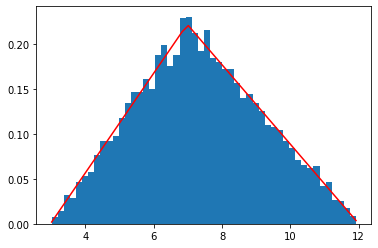

In [44]:
plt.hist(elect_price,bins=50,density=True)
plt.plot(x,pdf_fitted, label='triang', color = 'red')

Repeating the process for the cdf.

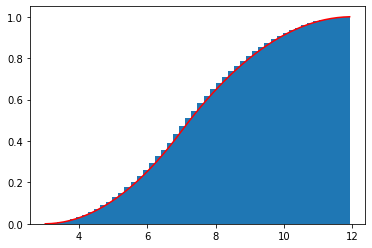

In [46]:
cdf_fitted = stats.triang.cdf(x, c=c, loc=a, scale=b)
plt.hist(elect_price,bins=50,density=True,cumulative=True)
plt.plot(x,cdf_fitted, label='triang', color = 'red')

### Fitting a Distribution to Wind Speed

In [47]:
wind_speed_data = pd.read_excel("Wind_Invest_Data.xlsx",sheet_name="Wind_Speed")
print(wind_speed_data.head(10),'\n')

#Getting summary statistics
print('Summary Statistics for Wind Speed')
print(wind_speed_data.iloc[:,1].describe())

#just transforming data frame into num py array to facilitate reference
wind_speed = np.array(wind_speed_data.iloc[:,1])


   Hour  Wind speed
0     1    6.751494
1     2    0.622990
2     3    3.393581
3     4    9.358401
4     5    1.028652
5     6    1.702179
6     7    9.103161
7     8    6.641888
8     9    1.564633
9    10    2.920598 

Summary Statistics for Wind Speed
count    23998.000000
mean         4.807075
std          3.157123
min          0.002110
25%          2.402191
50%          4.231052
75%          6.578301
max         22.070426
Name: Wind speed, dtype: float64


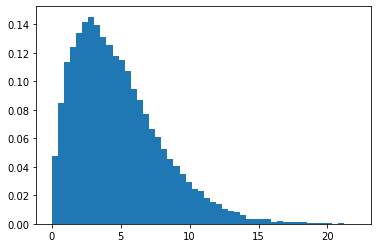

In [49]:
#Plotting histogram of observed data with density in the Y axis
plt.hist(wind_speed,bins=50,density=True)
plt.show() ##eliminate all the bins print

#### Exercise 1: Fit a lognormal to the data

(0.4738341288044157, -1.8546338354450902, 5.9702547250690845)


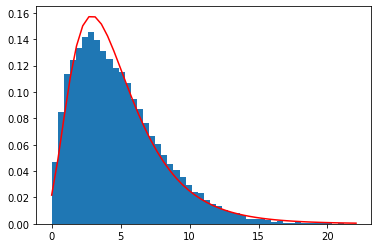

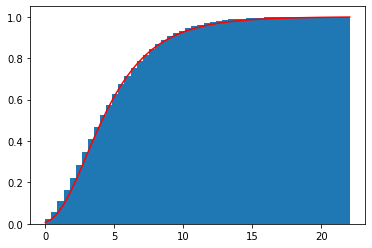

In [55]:
#Fit a lognormal to observed data using .fit()
params = stats.lognorm.fit(wind_speed)
print(params)
[shape, loc, scale]=params

#Create vector with bins
min_speed=np.min(wind_speed)
max_speed=np.max(wind_speed)
x = np.linspace(start=min_speed,stop=max_speed,num=50)
#print(x)

#Compute theoretical pdf and cdf
pdf_fitted_L = stats.lognorm.pdf(x, s=shape, loc=loc, scale=scale)
cdf_fitted_L = stats.lognorm.cdf(x, s=shape, loc=loc, scale=scale)

#Print both pdfs together
plt.hist(wind_speed,bins=50,density=True)
plt.plot(x,pdf_fitted_L, label='lognorm', color = 'red')

plt.figure()
plt.hist(wind_speed,bins=50,density=True,cumulative=True)
plt.plot(x,cdf_fitted_L, label='lognorm', color = 'red')

#### Exercise 2: Fit a Weibull to the data

Copy and paste the code chunk from Exercise 1 and adpat it to the weibull fitting. The Weibull distribution is called **weibull_min** in scipy.

(1.5554225879235488, -0.0013708136378058362, 5.348201296102402)


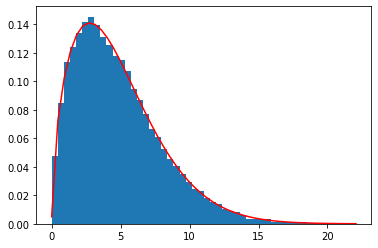

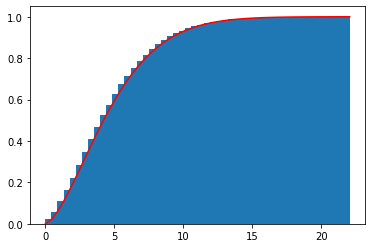

In [56]:
#Fit a weibull to observed data using .fit()
params = stats.weibull_min.fit(wind_speed)
print(params)
#Note that shape corresponds to the k parameter you calculated using Excel
#And scale is the lambda
[shape, loc, scale]=params


#Create vector with bins
min_price=np.min(wind_speed)
max_price=np.max(wind_speed)
x = np.linspace(start=min_price,stop=max_price,num=50)

#Compute theoretical pdf and cdf
pdf_fitted_W = stats.weibull_min.pdf(x, c=shape, loc=loc, scale=scale)
cdf_fitted_W = stats.weibull_min.cdf(x, c=shape, loc=loc, scale=scale)

#Print both pdfs together
plt.hist(wind_speed,bins=50,density=True)
plt.plot(x,pdf_fitted_W, label='weibull', color = 'red')

plt.figure()
plt.hist(wind_speed,bins=50,density=True,cumulative=True)
plt.plot(x,cdf_fitted_W, label='weibull', color = 'red')

#### Exercise 3: Generate a single plot with pdf for observed, theoretical Lognormal and theorical Weibull

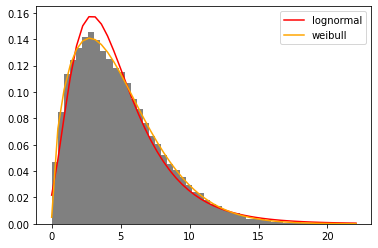

In [57]:
plt.hist(wind_speed,bins=50,density=True,color='gray')
plt.plot(x,pdf_fitted_L, label='lognormal', color = 'red')
plt.plot(x,pdf_fitted_W, label='weibull', color = 'orange')
plt.legend(loc='upper right')



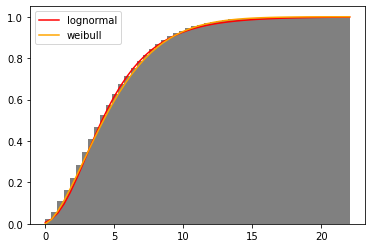

In [58]:
plt.hist(wind_speed,bins=50,density=True,cumulative=True,color='gray')
plt.plot(x,cdf_fitted_L, label='lognormal', color = 'red')
plt.plot(x,cdf_fitted_W, label='weibull', color = 'orange')
plt.legend(loc='upper left')

